In [3]:
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import os

load_dotenv()

allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')
boc = BrainObservatoryCache(manifest_file=str(Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

In [4]:
#511511001
cell_exp = boc.get_ophys_experiments(experiment_container_ids=[511511001])
#data_set = boc.get_ophys_experiment_events(511511001)
#dat=boc.get_experiment_containers(511511001)

In [5]:
cell_exp

[{'id': 506278598,
  'imaging_depth': 275,
  'targeted_structure': 'VISpm',
  'cre_line': 'Rorb-IRES2-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 88,
  'experiment_container_id': 511511001,
  'session_type': 'three_session_B',
  'donor_name': '228786',
  'specimen_name': 'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786',
  'fail_eye_tracking': True},
 {'id': 505811062,
  'imaging_depth': 275,
  'targeted_structure': 'VISpm',
  'cre_line': 'Rorb-IRES2-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 87,
  'experiment_container_id': 511511001,
  'session_type': 'three_session_C',
  'donor_name': '228786',
  'specimen_name': 'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-228786',
  'fail_eye_tracking': True},
 {'id': 506540916,
  'imaging_depth': 275,
  'targeted_structure': 'VISpm',
  'cre_line': 'Rorb-IRES2-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 89,
  'experiment_container_id': 511511001,
  'session_type': 'three_session_A',


In [10]:
import pickle
file_path = "/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/google_vit-base-patch16-224-in21k_embeddings.pkl"

with open(file_path, 'rb') as file:
    transfr = pickle.load(file)

print(transfr) 

{'natural_movie_one': array([[ 0.15474109, -0.21664083,  0.28223929, ..., -0.09267968,
         0.28659159, -0.24431331],
       [ 0.29176757, -0.07541179, -0.21240199, ..., -0.17095642,
        -0.45944124, -0.55567753],
       [ 0.31295866, -0.11137368, -0.33041185, ..., -0.1862639 ,
        -0.48867032, -0.5173654 ],
       ...,
       [ 0.49249977, -0.66381383,  0.2804504 , ...,  0.36285573,
         0.0133081 , -0.32655248],
       [ 0.54520386, -0.64170301,  0.32991105, ...,  0.67677408,
        -0.2688832 ,  0.11149126],
       [ 0.55117595, -0.71902919, -0.13872029, ...,  0.3683044 ,
        -0.08161116,  0.10802519]]), 'natural_movie_two': array([[ 0.50542468, -0.74632651, -0.09666888, ...,  0.26893696,
         0.00080879, -0.0451454 ],
       [ 0.32269448, -0.7255069 ,  0.11043712, ...,  0.49895117,
        -0.14799875,  0.08729225],
       [ 0.3548902 , -0.65193462,  0.13763492, ...,  0.56592023,
        -0.20311958,  0.16430445],
       ...,
       [-0.61588007, -0.0165305

In [12]:
data_set_regression = boc.get_ophys_experiment_data(506278598)
data_set_events= boc.get_ophys_experiment_events(506278598)
cells = data_set_regression.get_cell_specimen_ids()
cell2ix={cell:ix for ix, cell in enumerate(cells)}
ix2cell={ix:cell for ix, cell in enumerate(cells)}
stim_table=data_set_regression.get_stimulus_table('natural_movie_one')

2024-12-03 00:01:50,446 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516779867
2024-12-03 00:02:41,952 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/739721295


In [15]:
data_set_events.shape

(55, 114119)

In [18]:
ts=stim_table[stim_table['repeat'] == 0]['start']

In [23]:
ds=data_set_events[:,ts]

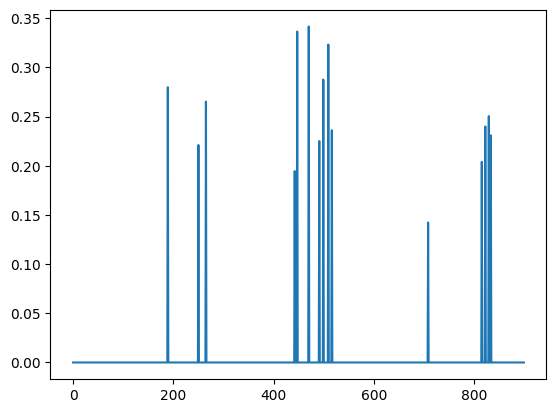

In [25]:
import matplotlib.pyplot as plt

plt.plot(ds[2,:])

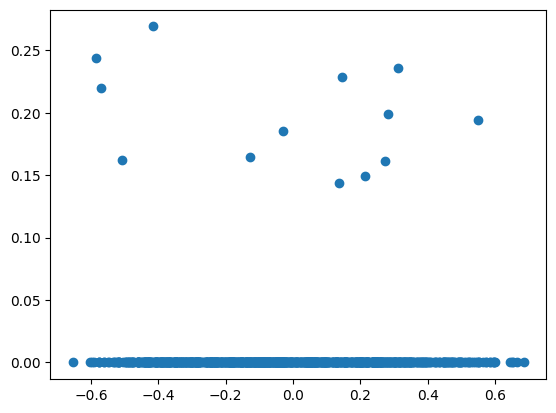

In [32]:
movie_one=transfr['natural_movie_one']

plt.scatter(movie_one[:,0], ds[6,:])



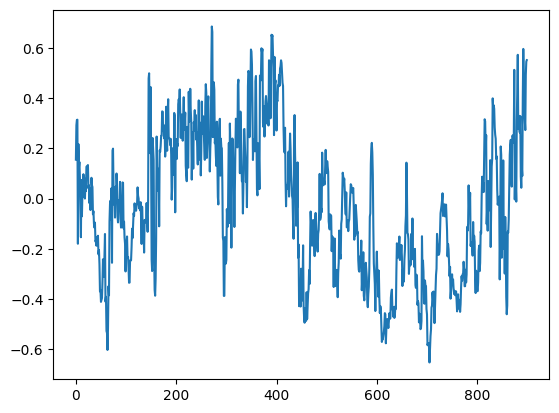

In [33]:
plt.plot(movie_one[:,0])

(array([ 19.,  84., 117., 138., 148., 123., 132.,  78.,  47.,  14.]),
 array([-0.65292317, -0.51911315, -0.38530313, -0.25149311, -0.11768309,
         0.01612693,  0.14993695,  0.28374697,  0.41755699,  0.55136701,
         0.68517703]),
 <BarContainer object of 10 artists>)

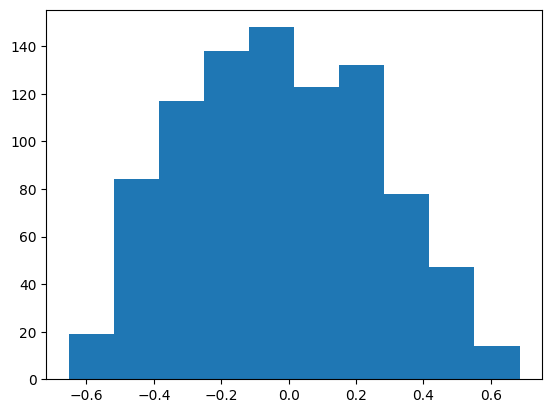

In [34]:
plt.hist(movie_one[:,0])

[[0.22896979 0.2361609  0.14411528 0.14908418 0.19446432 0.19886029
  0.18533595 0.16470514 0.21968483 0.16239885 0.26920553 0.24355305
  0.161297  ]]
(900,)


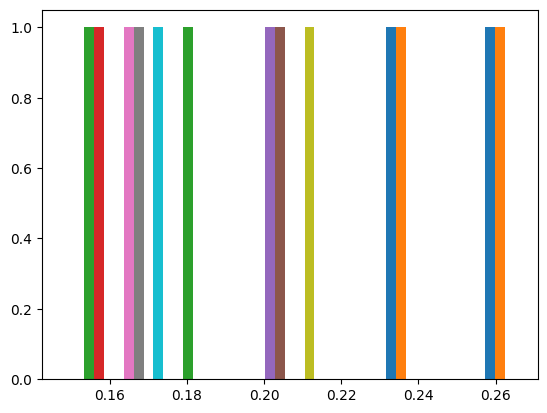

In [43]:
nonzero=np.where(ds[6,:]>0.0)
print(ds[6,nonzero])
plt.hist(ds[6,nonzero],bins=3)
print(ds[6,:].shape)

Mismatch in lengths of embedding_means and frame_indices


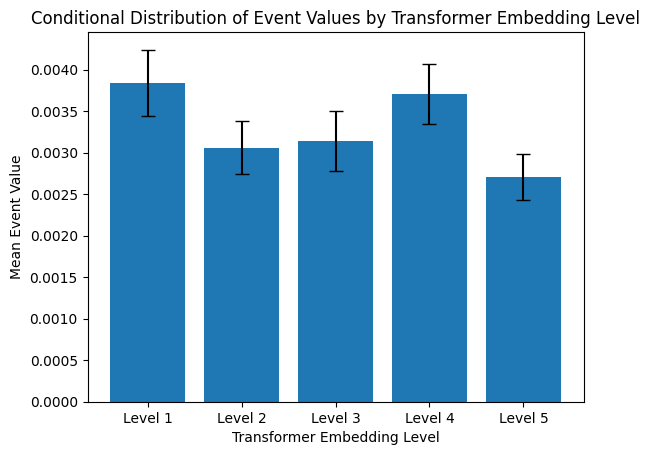

In [45]:
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import os
import pickle

# Load environment variables
load_dotenv()
allen_cache_path = os.environ.get('HGMS_ALLEN_CACHE_PATH')

# Initialize BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file=str(Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

# Get ophys experiments
cell_exp = boc.get_ophys_experiments(experiment_container_ids=[511511001])

# Load Transformer embeddings
file_path = "/home/maria/Documents/HuggingMouseData/TransformerEmbeddings/google_vit-base-patch16-224-in21k_embeddings.pkl"
with open(file_path, 'rb') as file:
    transfr = pickle.load(file)

movie_one = transfr['natural_movie_one']

# Get experiment data
data_set_regression = boc.get_ophys_experiment_data(506278598)

# Get events data
#cell_specimen_ids, event_traces = data_set_regression.get_events()

cell_specimen_ids = data_set_regression.get_cell_specimen_ids()
#cell2ix = {cell: ix for ix, cell in enumerate(cells)}
#ix2cell = {ix: cell for ix, cell in enumerate(cells)}

event_traces = boc.get_ophys_experiment_events(506278598)

# Get stimulus table for all repeats
stim_table = data_set_regression.get_stimulus_table('natural_movie_one')


# Get frame indices for natural_movie_one presentations across all repeats
frame_indices = []
for idx, row in stim_table.iterrows():
    frames = np.arange(row['start'], row['end'])
    frame_indices.extend(frames)
frame_indices = np.array(frame_indices)

# Compute the mean of the embeddings to get a scalar per time point
embedding_means = movie_one.mean(axis=1)

# Check if lengths match
if len(embedding_means) != len(frame_indices):
    print("Mismatch in lengths of embedding_means and frame_indices")
    # Handle mismatch if necessary
    # For this example, we'll proceed assuming they match

# Average event values over cells and extract at frame indices
event_means = event_traces.mean(axis=0)
event_means_at_frames = event_means[frame_indices]

# Partition the embeddings into 5 levels based on quantiles
quantiles = np.percentile(embedding_means, [20, 40, 60, 80])
bins = np.concatenate(([-np.inf], quantiles, [np.inf]))
levels = np.digitize(embedding_means, bins) - 1  # Levels from 0 to 4

# Collect event values for each level
event_values_per_level = []
for level in range(5):
    indices = np.where(levels == level)[0]
    event_values = event_means_at_frames[indices]
    event_values_per_level.append(event_values)

# Compute mean and standard error for each level
means = []
stderrs = []
for event_values in event_values_per_level:
    mean_event = np.mean(event_values)
    std_event = np.std(event_values)
    n = len(event_values)
    stderr_event = std_event / np.sqrt(n)
    means.append(mean_event)
    stderrs.append(stderr_event)

# Plot the bar chart
plt.bar(range(5), means, yerr=stderrs, capsize=5)
plt.xlabel('Transformer Embedding Level')
plt.ylabel('Mean Event Value')
plt.title('Conditional Distribution of Event Values by Transformer Embedding Level')
plt.xticks(range(5), ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])
plt.show()


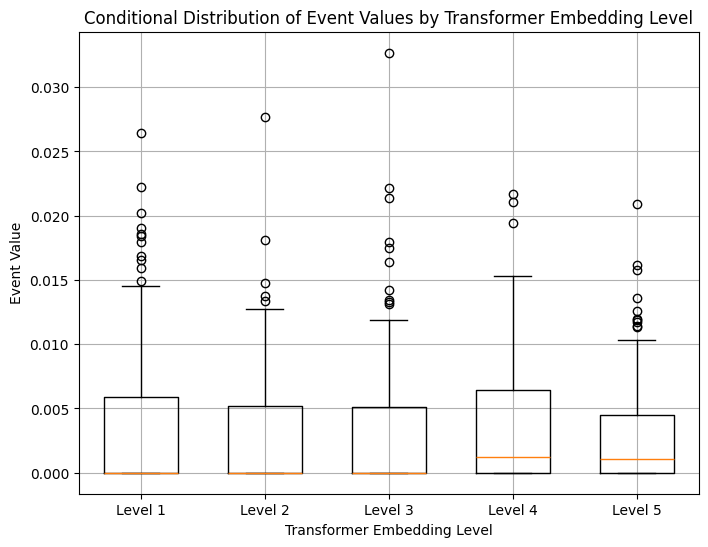

In [46]:
# Average event values over cells and extract at frame indices
event_means = event_traces.mean(axis=0)
event_means_at_frames = event_means[frame_indices]

# Partition the embeddings into 5 levels based on quantiles
quantiles = np.percentile(embedding_means, [20, 40, 60, 80])
bins = np.concatenate(([-np.inf], quantiles, [np.inf]))
levels = np.digitize(embedding_means, bins) - 1  # Levels from 0 to 4

# Collect event values for each level
event_values_per_level = []
for level in range(5):
    indices = np.where(levels == level)[0]
    event_values = event_means_at_frames[indices]
    event_values_per_level.append(event_values)

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(event_values_per_level, positions=range(1, 6), widths=0.6)
plt.xlabel('Transformer Embedding Level')
plt.ylabel('Event Value')
plt.title('Conditional Distribution of Event Values by Transformer Embedding Level')
plt.xticks(range(1, 6), ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])
plt.grid(True)
plt.show()